# comienza ejemplo lectura de archivo y histogram

In [1]:
#import regex
import re
#import module add
from operator import add


In [2]:
#read file
file_in = sc.textFile("/home/juandavid/Documentos/datosLibro/filechapter1.txt")


In [5]:
#count number of lines
print('the number of lines is: %s'% file_in.count())

the number of lines is: 53


In [19]:
#obtiene la longitud de cada linea y luego las suma para
#hallar numero de caracteres
char_file = file_in.map(lambda x: len(x)).reduce(add)
print('number of characters in the file: %s' % char_file)


number of characters in the file: 2925


In [26]:
#get words from the input
words_split = file_in.flatMap(lambda x: re.split('\W+', x.lower().strip()))
#get words more than 3 character
words = words_split.filter(lambda x: len(x) > 3)
#map (word,1)
words_count = words.map(lambda x: (x,1)).reduceByKey(add)


In [28]:
#change order of words_count (count ,words) and sort descending
words_change = words_count.map(lambda x: (x[1],x[0])).sortByKey(False)

In [29]:
words_change.take(20)

[(7, u'management'),
 (5, u'operations'),
 (5, u'with'),
 (5, u'state'),
 (5, u'training'),
 (5, u'inventory'),
 (4, u'solutions'),
 (4, u'team'),
 (4, u'efforts'),
 (4, u'city'),
 (4, u'company'),
 (3, u'including'),
 (3, u'program'),
 (3, u'safety'),
 (3, u'background'),
 (3, u'production'),
 (3, u'solid'),
 (3, u'tracking'),
 (3, u'effective'),
 (2, u'managed')]

In [30]:
% matplotlib inline
import matplotlib.pyplot as plt

In [33]:
def histogramFunc(words):
    count = map(lambda x: x[0],words)
    word = map(lambda x: x[1],words)
    #create histogram
    plt.barh(range(len(count)), count,color = 'grey')
    plt.yticks(range(len(count)), word)

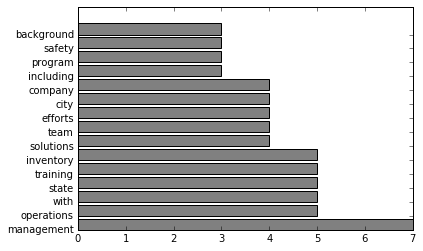

In [34]:
histogramFunc(words_change.take(15))